In [4]:
import dask.bag as db
import dask.dataframe as dd
import pandas as pd
import json

# Import matplotlib and Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set iPython to display visualization inline
%matplotlib inline

#df = pd.read_json('yelp_academic_dataset_business.json')

js = db.from_filenames('yelp_academic_dataset_business.json').map(json.loads)
print(js.take(2))
rlongs = js.pluck('longitude')
rlats = js.pluck('latitude')
longs = []
lats = []
for a in rlongs:
    longs.append(a)   
for b in rlats:
    lats.append(b)




({'business_id': '5UmKMjUEUNdYWqANhGckJw', 'stars': 4.5, 'state': 'PA', 'name': 'Mr Hoagie', 'neighborhoods': [], 'full_address': '4734 Lebanon Church Rd\nDravosburg, PA 15034', 'attributes': {'Good For Groups': True, 'Ambience': {'intimate': False, 'touristy': False, 'hipster': False, 'casual': False, 'romantic': False, 'classy': False, 'divey': False, 'trendy': False, 'upscale': False}, 'Drive-Thru': False, 'Has TV': False, 'Delivery': False, 'Accepts Credit Cards': True, 'Attire': 'casual', 'Parking': {'validated': False, 'garage': False, 'valet': False, 'street': False, 'lot': False}, 'Caters': False, 'Price Range': 1, 'Noise Level': 'average', 'Good For': {'breakfast': False, 'lunch': False, 'brunch': False, 'dessert': False, 'latenight': False, 'dinner': False}, 'Take-out': True, 'Alcohol': 'none', 'Takes Reservations': False, 'Waiter Service': False, 'Good for Kids': True, 'Outdoor Seating': False}, 'hours': {'Friday': {'close': '21:00', 'open': '11:00'}, 'Monday': {'close': '21

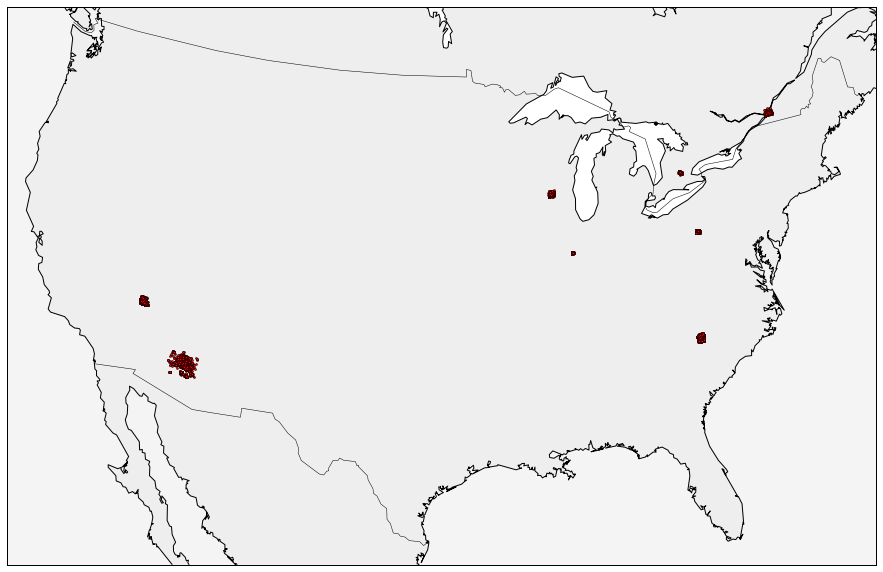

In [70]:
# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='lcc', resolution='l',
                   llcrnrlon=-119, urcrnrlon=-64,
                   llcrnrlat=22, urcrnrlat=49,
                   lat_1=33, lat_2=45, lon_0=-95,
                   area_thresh=10000)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#eeeeee')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

print(js.pluck('longitude'))
# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(longs, lats)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=2)

# Show the map
plt.show()

In [5]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

x_range=(-18000000,18000000)
y_range=(-18000000,18000000)

def base_plot(tools='pan,wheel_zoom,reset',webgl=False):
    p = figure(tools=tools, plot_width=900, plot_height=600,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, webgl=webgl)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
options = dict(line_color=None, fill_color='blue', size=5)

Loading BokehJS ...

In [6]:
from bokeh.io import output_file
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)

map_options = GMapOptions(lat=30.29, lng=-97.73, map_type="roadmap", zoom=5)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options, title="US"
)

def getSource(coordList):
    source = ColumnDataSource(
        data=dict(
            lat=[i[0] for i in coordList],
            lon=[i[1] for i in coordList],
        )
    )
    return source


ratings = js.pluck('stars')
good = []
avg = []
bad = []
for idx, r in enumerate(ratings):
    if r >= 3.5:
        good.append((lats[idx], longs[idx]))
    elif r >= 2.5:
        avg.append((lats[idx], longs[idx]))
    else:
        bad.append((lats[idx], longs[idx]))

goodRev = Circle(x="lon", y="lat", size=2, fill_color="green", fill_alpha=0.1, line_color=None)
avgRev = Circle(x="lon", y="lat", size=2, fill_color="yellow", fill_alpha=0.1, line_color=None)
badRev = Circle(x="lon", y="lat", size=2, fill_color="red", fill_alpha=0.1, line_color=None)

plot.add_glyph(getSource(good), goodRev)
plot.add_glyph(getSource(avg), avgRev)
plot.add_glyph(getSource(bad), badRev)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
output_file("gmap_plot.html")
show(plot)

In [13]:
reviews = db.from_filenames('yelp_academic_dataset_review.json').map(json.loads)
print(reviews.take(2))

({'user_id': 'PUFPaY9KxDAcGqfsorJp3Q', 'review_id': 'Ya85v4eqdd6k9Od8HbQjyA', 'text': 'Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.', 'stars': 4, 'business_id': '5UmKMjUEUNdYWqANhGckJw', 'type': 'review', 'date': '2012-08-01', 'votes': {'funny': 0, 'cool': 0, 'useful': 0}}, {'user_id': 'Iu6AxdBYGR4A0wspR9BYHA', 'review_id': 'KPvLNJ21_4wbYNctrOwWdQ', 'text': "Excellent food. Superb customer service. I miss the mario machines they used to have, but it's still a great place steeped in tradition.", 'stars': 5, 'business_id': '5UmKMjUEUNdYWqANhGckJw', 'type': 'review', 'date': '2014-02-13'

In [3]:
tips = db.from_filenames('yelp_academic_dataset_tip.json').map(json.loads)
print(tips.take(5))

({'user_id': '-6rEfobYjMxpUWLNxszaxQ', 'business_id': 'cE27W9VPgO88Qxe4ol6y_g', 'type': 'tip', 'likes': 0, 'text': "Don't waste your time.", 'date': '2013-04-18'}, {'user_id': 'EZ0r9dKKtEGVx2CdnowPCw', 'business_id': 'mVHrayjG3uZ_RLHkLj-AMg', 'type': 'tip', 'likes': 1, 'text': 'Your GPS will not allow you to find this place. Put Rankin police department in instead. They are directly across the street.', 'date': '2013-01-06'}, {'user_id': 'xb6zEQCw9I-Gl0g06e1KsQ', 'business_id': 'KayYbHCt-RkbGcPdGOThNg', 'type': 'tip', 'likes': 0, 'text': 'Great drink specials!', 'date': '2013-12-03'}, {'user_id': 'QawZN4PSW7ng_9SP7pjsVQ', 'business_id': 'KayYbHCt-RkbGcPdGOThNg', 'type': 'tip', 'likes': 0, 'text': 'Friendly staff, good food, great beer selection, and relaxing atmosphere', 'date': '2015-07-08'}, {'user_id': 'MLQre1nvUtW-RqMTc4iC9A', 'business_id': '1_lU0-eSWJCRvNGk78Zh9Q', 'type': 'tip', 'likes': 0, 'text': 'Beautiful restoration.', 'date': '2015-10-25'})


In [5]:
checkins = db.from_filenames('yelp_academic_dataset_checkin.json').map(json.loads)
print(checkins.take(1))

({'type': 'checkin', 'checkin_info': {'9-5': 1, '17-3': 1, '7-5': 1, '13-3': 1, '10-0': 1, '18-4': 1, '14-6': 1, '17-6': 1, '13-0': 1}, 'business_id': 'cE27W9VPgO88Qxe4ol6y_g'},)
